In [18]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

In [33]:
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size':18})

In [34]:
A = imread('../../assets/sample.png')
B = np.mean(A, -1) # convert image from RGB to GrayScale

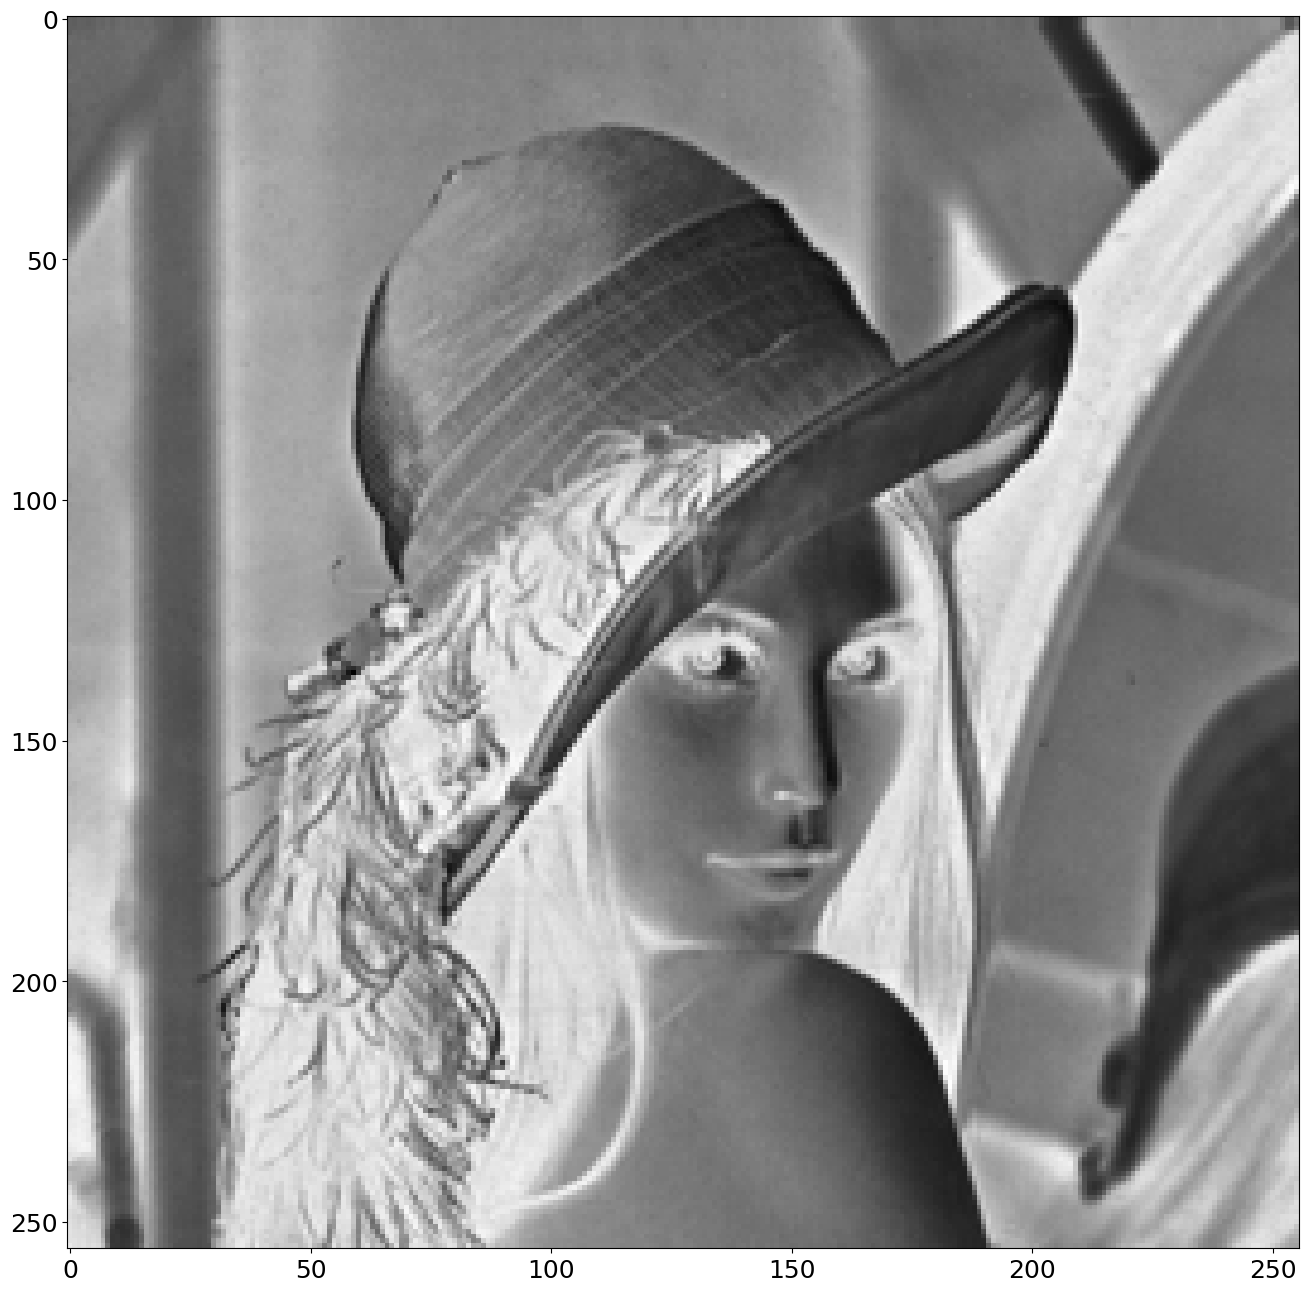

In [35]:
plt.imshow(B, cmap='gray_r')
plt.show()

## Decomposing the image

In [50]:
n = 2
w = "db1"
coeffs = pywt.wavedec2(data=B, wavelet=w, level=n)

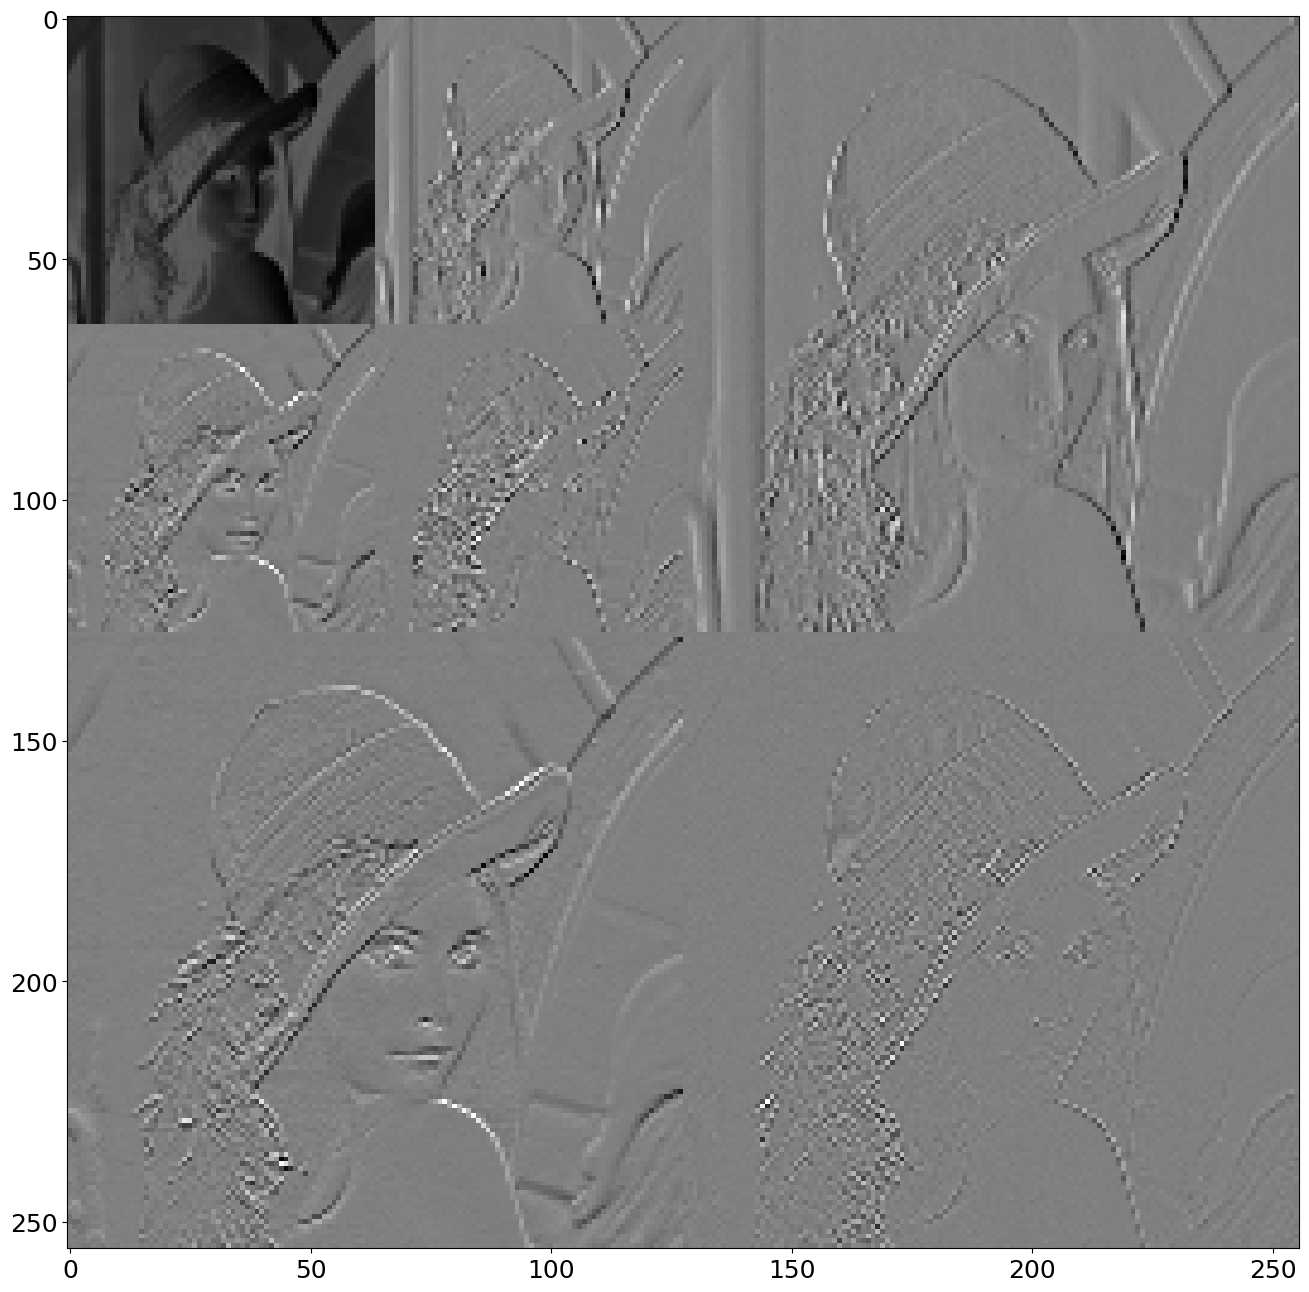

In [51]:
# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(1, len(coeffs)):
    coeffs[detail_level] = [d / np.max(np.abs(d)) if np.max(np.abs(d)) != 0 else d for d in coeffs[detail_level]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr, cmap='gray_r')
plt.show()

A lot of ray in the image described by small coefficients which gives room for compression, all things that are gray can be compressed

## Reconstructing the image

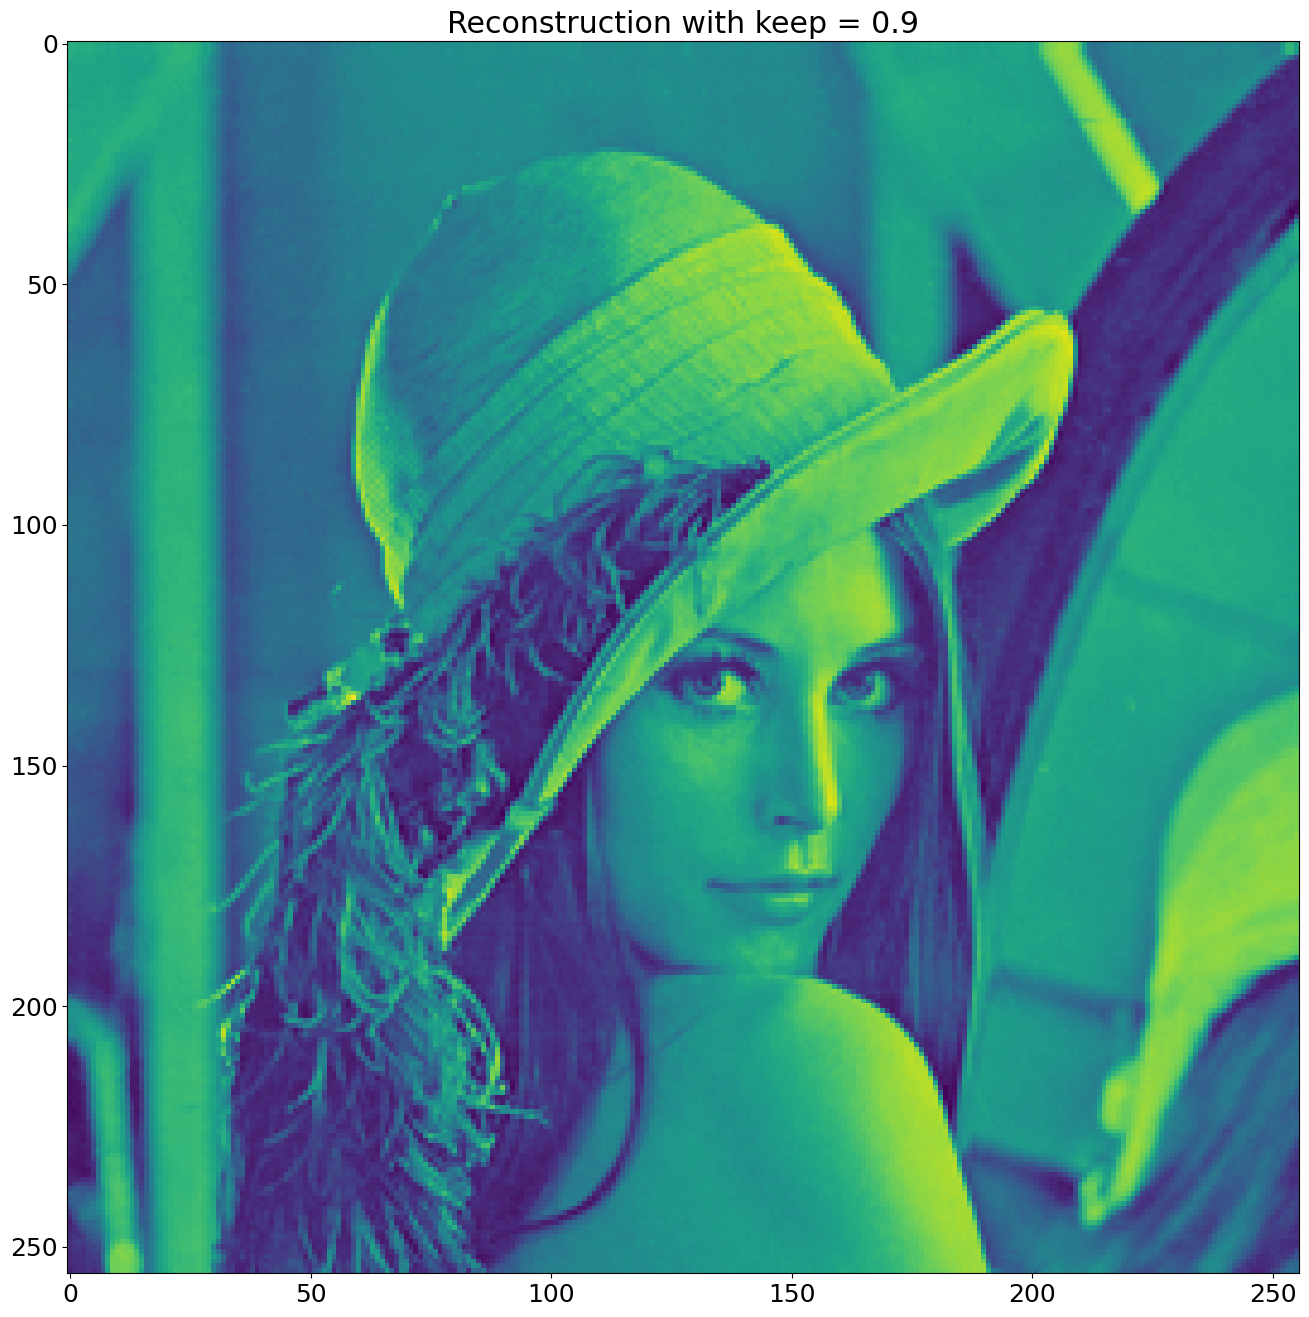

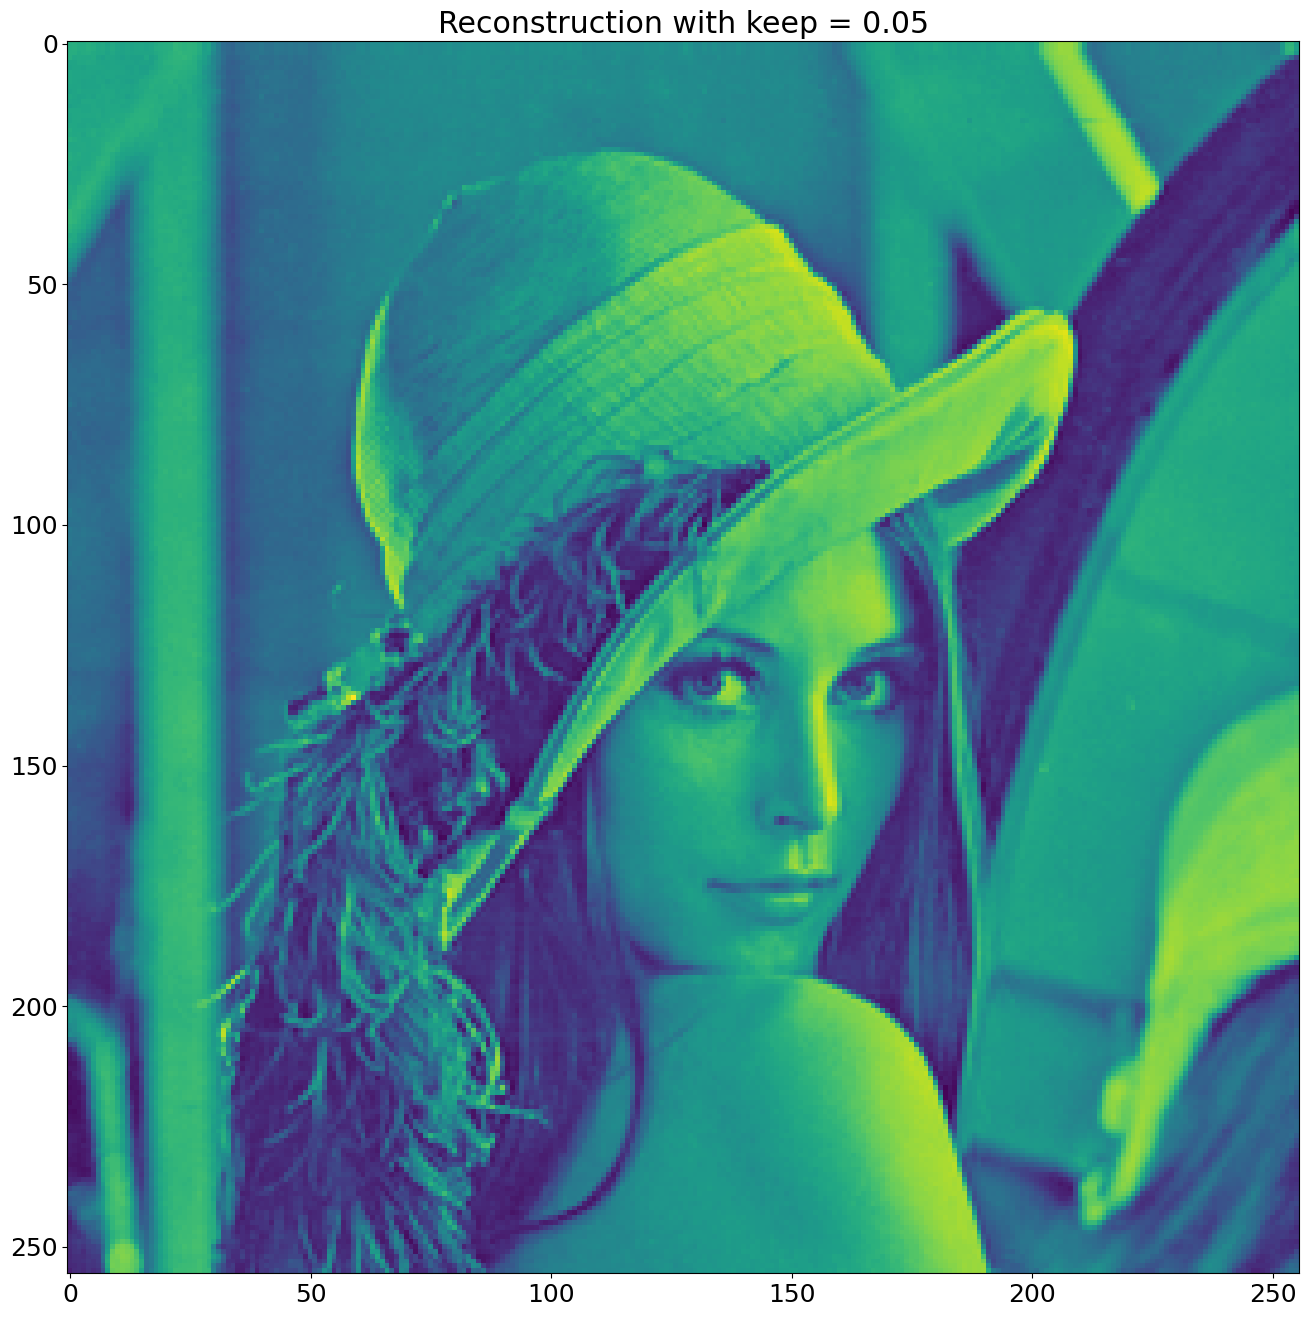

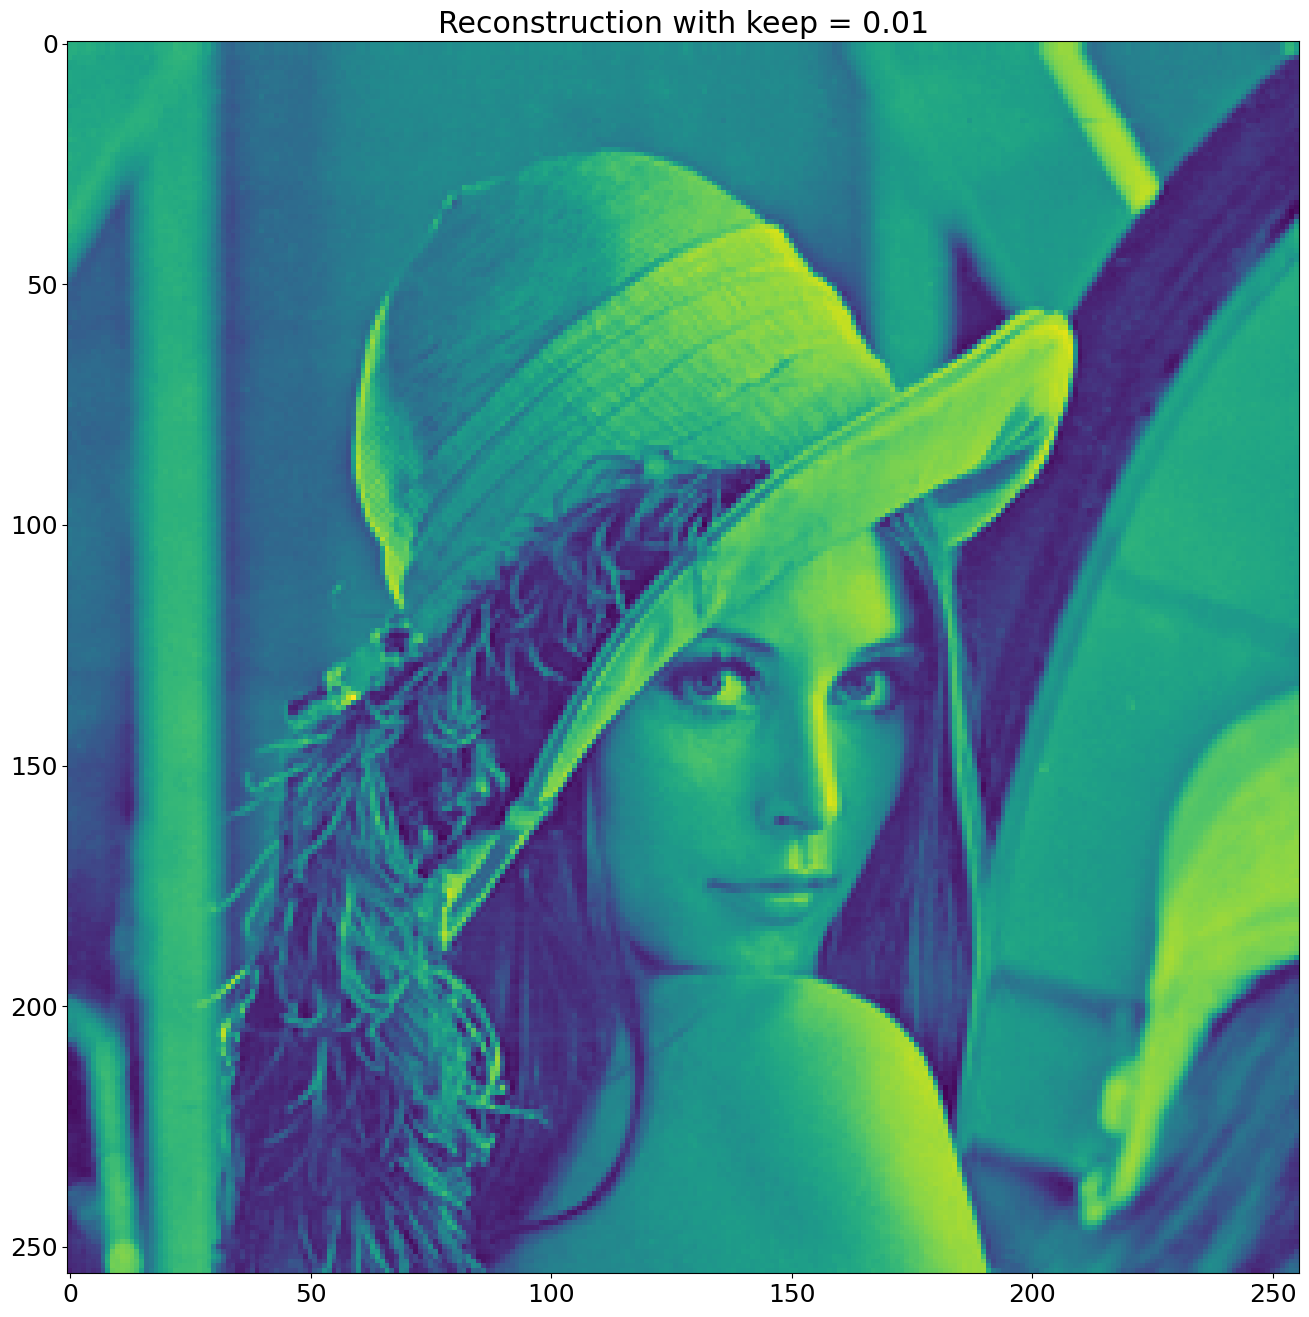

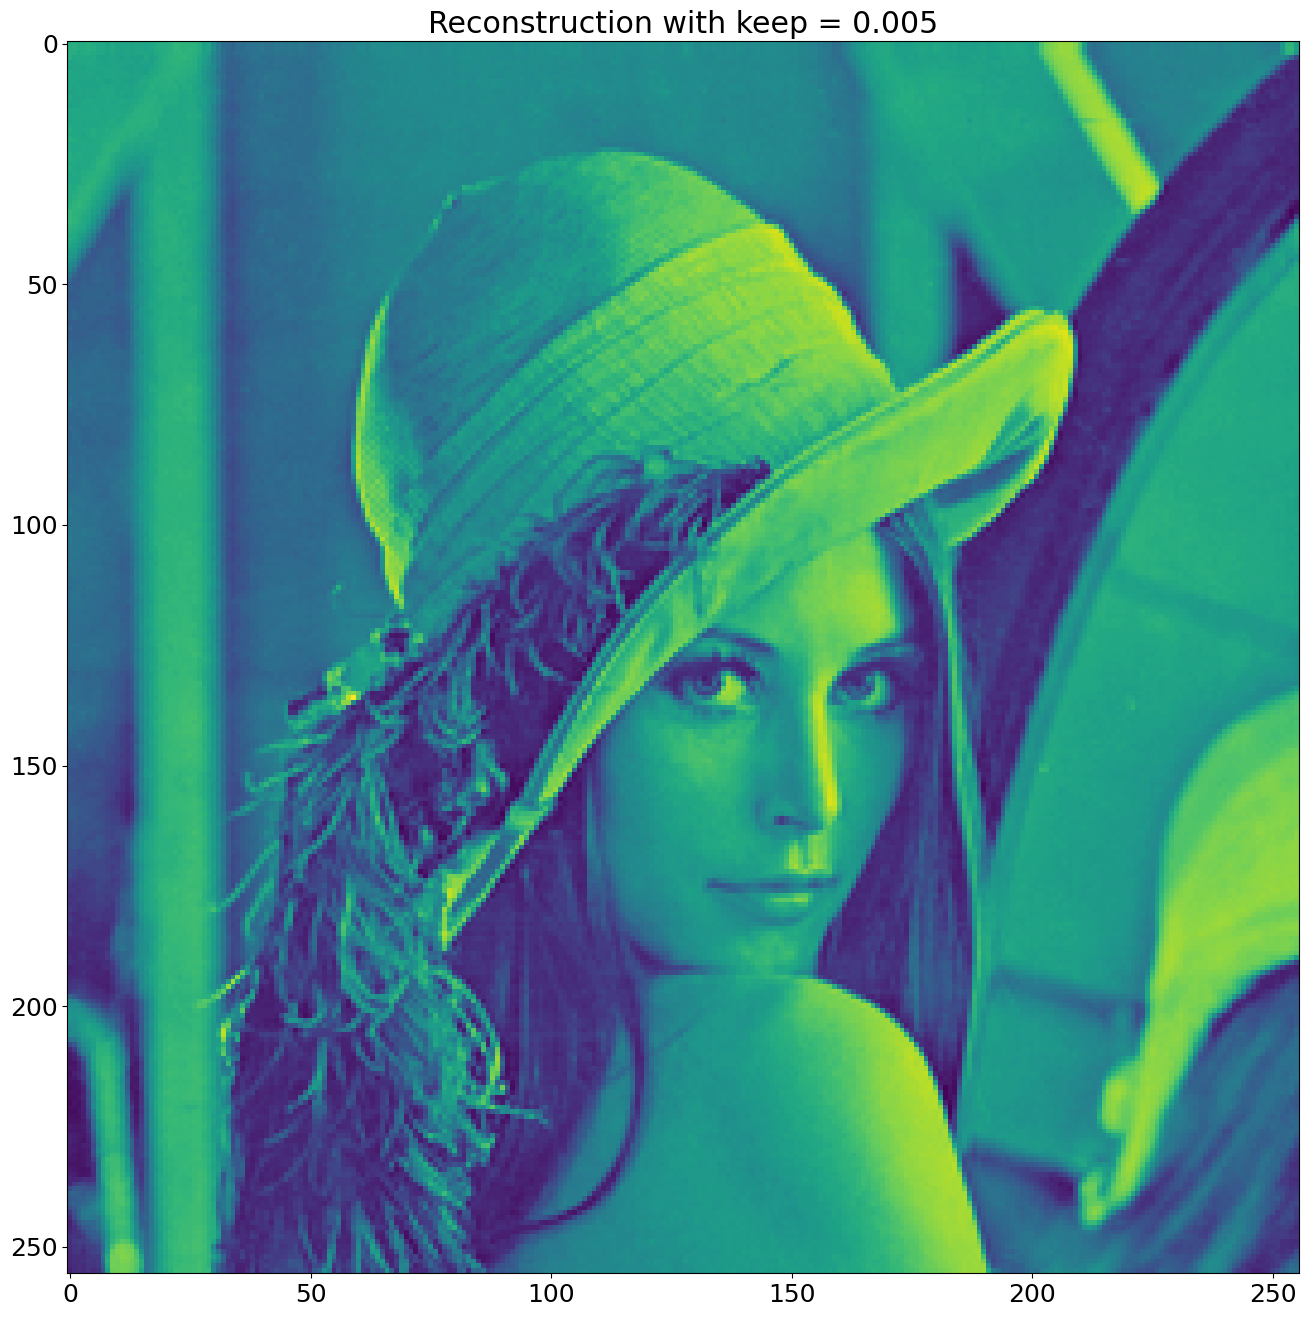

In [60]:
n = 2
w = "db1"
coeffs = pywt.wavedec2(data=B, wavelet=w, level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
Csoft = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in [0.9, 0.05, 0.01, 0.005]:
    thresh = Csoft[int(np.floor((1-keep)*len(Csoft)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind
    coeffs_filt = pywt.array_to_coeffs(coeff_arr, coeff_slices, output_format='wavedec2')

    reconstructed_image = pywt.waverec2(coeffs_filt, wavelet=w)
    reconstructed_image_uint8 = (reconstructed_image*255).astype('uint8')

    plt.figure()
    plt.title(f'Reconstruction with keep = {keep}')
    plt.imshow(reconstructed_image_uint8)
    plt.show()